Lesson 11

Author: Rodrigo MM Santiago @rodrigommsantiago

In [5]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# inline plots
%matplotlib inline 

# Hilbert transform and filter functions
from scipy.signal import butter,filtfilt,hilbert

import pylab as pl          # animations
from IPython import display # display tools

Instantaneous phase via Hilbert transform:

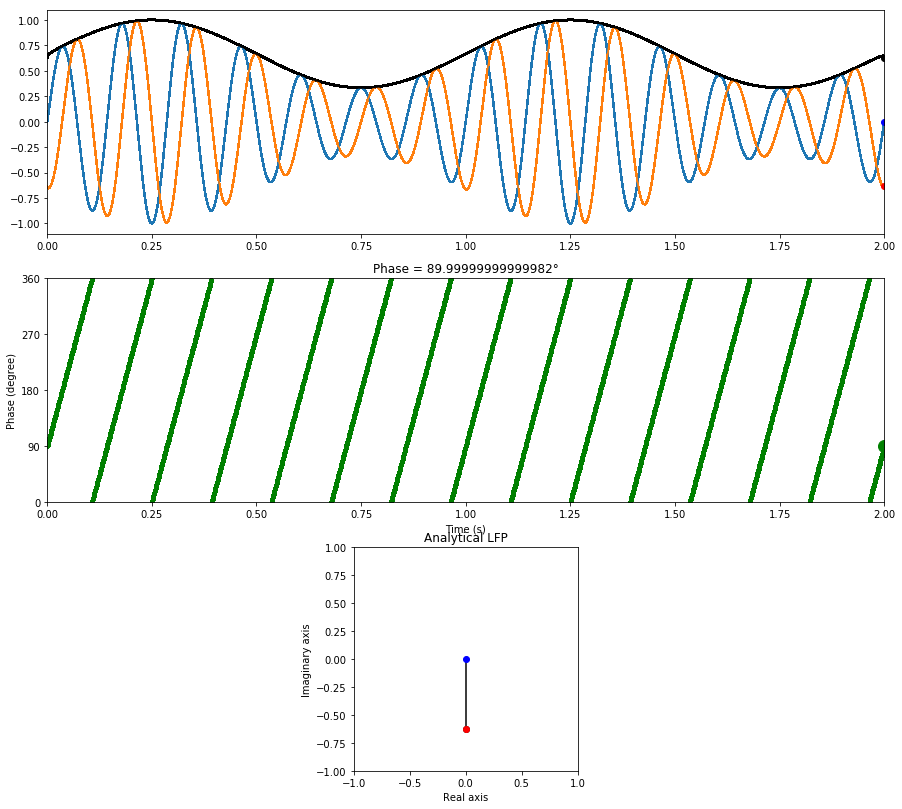

In [2]:
srate = 1000                # sampling rate (Hz)
dt = 1./srate               # sampling interval (s)
t = np.arange(0.,2.0001,dt) # time vector

A = (2+np.sin(2*np.pi*1*t))/3. # modulation amplitude
LFP = A*np.sin(2*np.pi*7*t)    # LFP signal modulated by A

# 'hilbert' function returns X(t)+iH(X(t))
# [analytic representation of the signal]

analytical_LFP = hilbert(LFP)
HLFP = np.imag(analytical_LFP)
EnvAmp = abs(analytical_LFP)

#################### Fase ####################
Phase = np.angle(analytical_LFP) # radians
Phase = np.rad2deg(Phase)+180   # degrees
##############################################

plt.figure(figsize=(15,14))

ax = plt.subplot(313)
ax.axis('square')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_title('Analytical LFP')

for t_sample in np.arange(0,len(t)+1,5): # time sample
    plt.subplot(311)
    plt.plot(t,LFP,'C0')
    plt.plot(t,HLFP,'C1')
    plt.plot(t,EnvAmp,'k',linewidth=2)
    point1 = plt.plot(t[t_sample],LFP[t_sample],'bo',markerfacecolor='b')
    point2 = plt.plot(t[t_sample],HLFP[t_sample],'ro',markerfacecolor='r')
    point3 = plt.plot(t[t_sample],EnvAmp[t_sample],'ko',markerfacecolor='k')
    plt.xlim(t[0],t[-1])

    plt.subplot(312)
    plt.plot(t,Phase,'g.')
    phasepoint = plt.plot(t[t_sample],Phase[t_sample],'go',markerfacecolor='g',markersize=12)
    plt.ylim([0,360])
    plt.title('Phase = '+str(Phase[t_sample])+u'\N{DEGREE SIGN}')
    plt.yticks(np.arange(0,361,90))
    plt.xlim(t[0],t[-1])
    plt.xlabel('Time (s)')
    plt.ylabel('Phase (degree)')

    line = ax.plot([0,LFP[t_sample]],[0,HLFP[t_sample]],'k-')
    point4 = ax.plot(LFP[t_sample],HLFP[t_sample],'ko',markerfacecolor='k')
    point5 = ax.plot(LFP[t_sample],0,'bo',markerfacecolor='b')
    point6 = ax.plot(0,HLFP[t_sample],'ro',markerfacecolor='r')
    display.display(pl.gcf())       # shows next plot
    display.clear_output(wait=True) # holds display for next plot
    if t_sample < len(t)-1:
        point1[-1].remove()
        point2[-1].remove()
        point3[-1].remove()
        point4[-1].remove()
        point5[-1].remove()
        point6[-1].remove()
        line[-1].remove()
        phasepoint[-1].remove()

Instantaneous frequency:

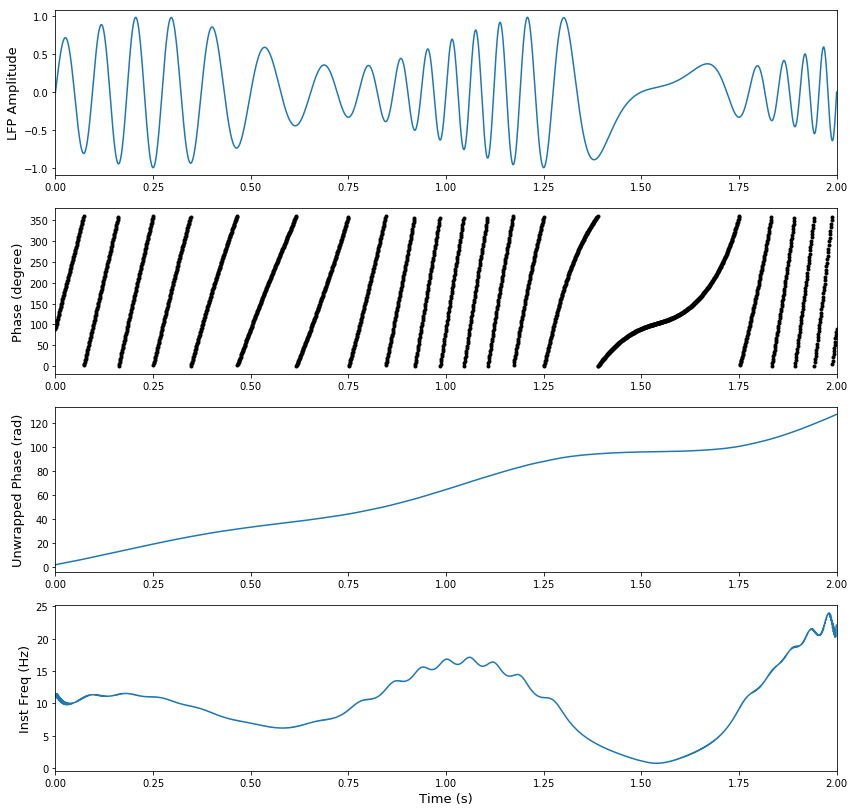

In [3]:
srate = 1000                # sampling rate (Hz)
dt = 1./srate               # sampling interval (s)
t = np.arange(0.,2.0001,dt) # time vector

A   = (2+np.sin(2*np.pi*1*t))/3. # amplitude modulation
F   = 10 + np.sin(2*np.pi*1*t)   # frequency modulation
LFP = A*np.sin(2*np.pi*F*t)      # LFP modulated by A and F

Phase = np.angle(hilbert(LFP))+np.pi
PhaseUnwrapped = np.unwrap(Phase)

############### Inst. Freq.  ###############
Freq = np.diff(PhaseUnwrapped)/(2*np.pi*dt)
###########################################
# wrong way:
# Freq = np.diff(Phase)/(2*np.pi*dt)
# alternative method:
# Freq = np.angle(np.exp(1j*np.diff(Phase)))/(2*np.pi*dt)
###########################################

plt.figure(figsize=(14,14))
plt.subplot(411)
plt.plot(t,LFP)
plt.xlim(0,2)
plt.ylabel('LFP Amplitude',size=13)

plt.subplot(412)
plt.plot(t,np.rad2deg(Phase),'k.')
plt.ylabel('Phase (degree)',size=13)
plt.xlim(0,2)

plt.subplot(413)
plt.plot(t,PhaseUnwrapped)
plt.ylabel('Unwrapped Phase (rad)',size=13)
plt.xlim(0,2)


plt.subplot(414)
plt.plot(t[1::]-dt/2,Freq)
plt.ylabel('Inst Freq (Hz)',size=13)
plt.xlabel('Time (s)',size=13)
plt.xlim(0,2);

Phase Locking Value (PLV or Phase Coherence)

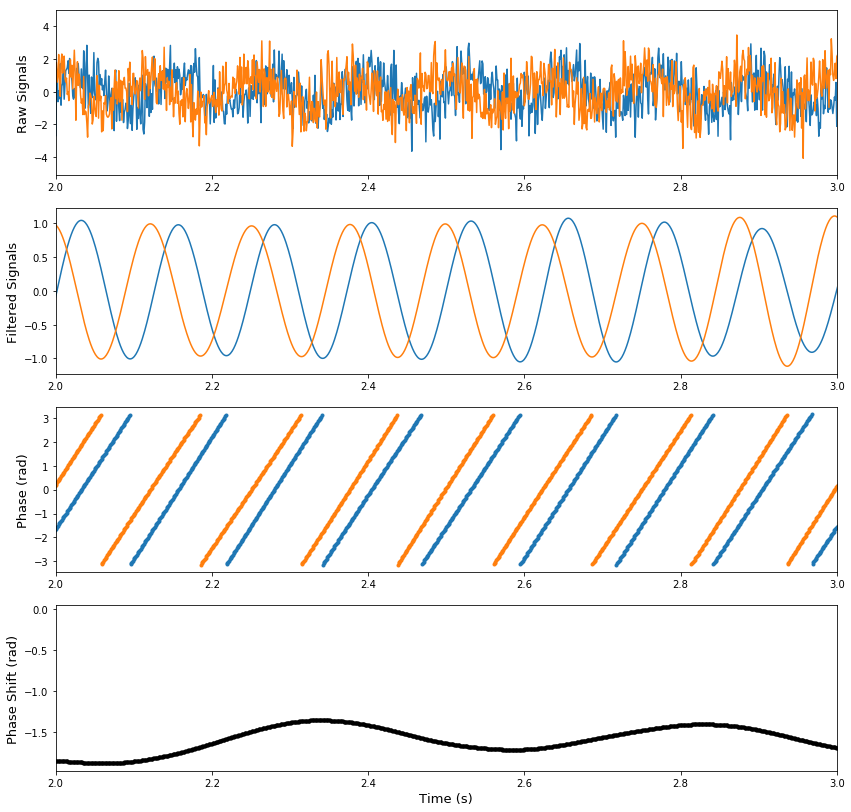

In [6]:
srate = 1000
dt = 1./srate
t = np.arange(0.,4+dt/2,dt)

LFP1 = np.sin(2*np.pi*8*t) + np.random.randn(len(t)) 
LFP2 = np.sin(2*np.pi*8*t+np.pi/2) + np.random.randn(len(t)) 

plt.figure(figsize=(14,14))
plt.subplot(411)
plt.plot(t,LFP1)
plt.plot(t,LFP2)
plt.xlim(2,3)
plt.ylabel('Raw Signals',size=13)

# Filtering the signal
order = 2 # filter order
nyq = 0.5*srate # Nyquist frequency
low_freq = 6. # low-pass frequency
lowcut = low_freq/nyq # cutoff point for filter
# butterworth transfer function
high_freq = 10. # high-pass frequency
highcut = high_freq/nyq # cutoff point for filter
b,a = butter(order,[lowcut,highcut],'bandpass')
# filtered signal
LFPfilt1 = filtfilt(b,a,LFP1)
LFPfilt2 = filtfilt(b,a,LFP2)

plt.subplot(412)
plt.plot(t,LFPfilt1)
plt.plot(t,LFPfilt2)
plt.xlim(2,3)
plt.ylabel('Filtered Signals',size=13)

plt.subplot(413)
Phase1 = np.angle(hilbert(LFPfilt1))
Phase2 = np.angle(hilbert(LFPfilt2))
plt.plot(t,Phase1,'.C0')
plt.plot(t,Phase2,'.C1')
plt.xlim(2,3)
plt.ylabel('Phase (rad)',size=13)

plt.subplot(414)
DeltaPhase = np.angle(np.exp(1j*(Phase1-Phase2)))
plt.plot(t,DeltaPhase,'.k')
plt.xlim(2,3)
plt.xlabel('Time (s)',size=13)
plt.ylabel('Phase Shift (rad)',size=13);

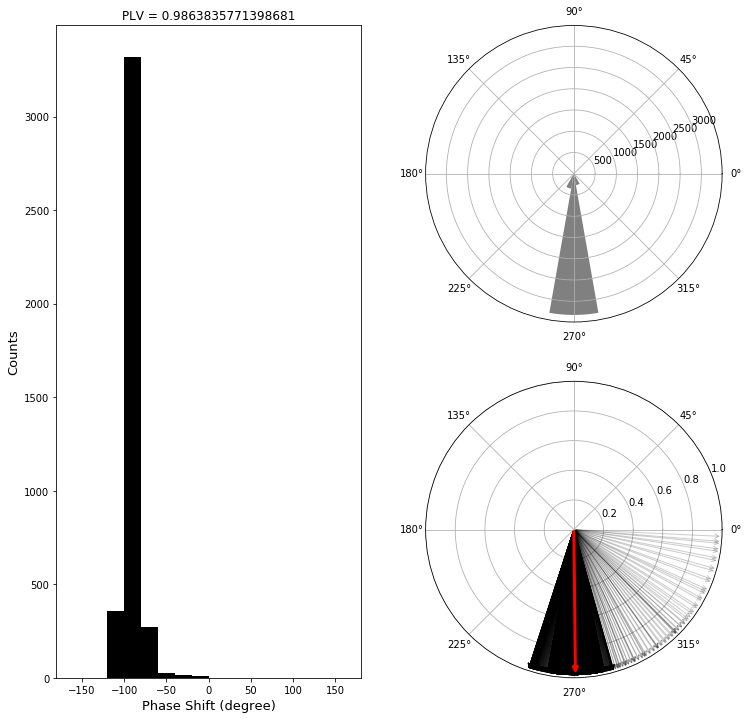

In [7]:
MeanVector = np.mean(np.exp(1j*DeltaPhase))
PLV = abs(MeanVector) # Phase Locking Value

plt.figure(figsize=(12,12))

plt.subplot(121)
phasebincenters = np.arange(-180,181,20)
counts,phasebins = np.histogram(DeltaPhase,np.deg2rad(phasebincenters))
plt.bar(np.rad2deg(phasebins[:-1])+10,counts,20,color='k')
plt.xlabel('Phase Shift (degree)',size=13)
plt.ylabel('Counts',size=13)
plt.xlim(-180,180)
plt.title('PLV = '+str(PLV))

plt.subplot(222,polar=True)
# Circular histogram
plt.bar(phasebins[:-1]+np.deg2rad(10),counts,np.deg2rad(20),color='grey')

ax = plt.subplot(224,polar=True)
kw = dict(arrowstyle="->",color='k',alpha=0.2)
for angle,radius in zip(DeltaPhase,np.ones(len(DeltaPhase))):
    ax.annotate("",xy=(angle,radius),xytext=(0,0),arrowprops=kw);
kw = dict(arrowstyle="->",color='r',linewidth=3)
ax.annotate("",xy=(np.angle(MeanVector),abs(MeanVector)),xytext=(0,0),arrowprops=kw);